In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Get first 5 rows
fd = df.head(5)

# Get last 5 rows
ld = df.tail(5)

# Concatenate first and last 5 rows
df1 = pd.concat([fd, ld])

# Show the concatenated DataFrame
print(df1)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
145       2  
146       

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Define features and labels
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values  # Features
y = df['target'].values  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
#Linear SvM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap='viridis')

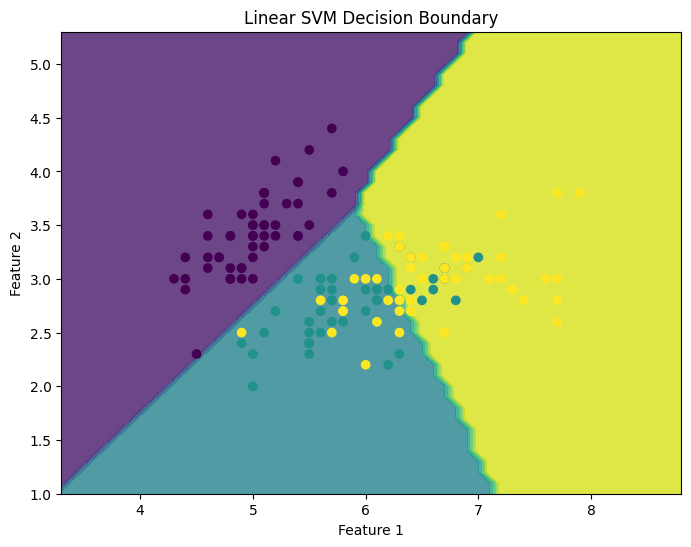

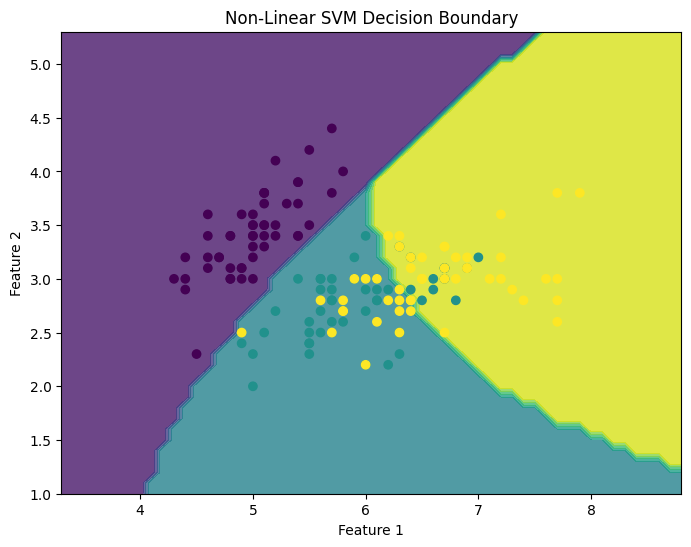

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Non-Linear SVM (Polynomial Kernel)
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Plot the decision boundary for Linear SVM
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_linear, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot the decision boundary for Non-Linear SVM
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_poly, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

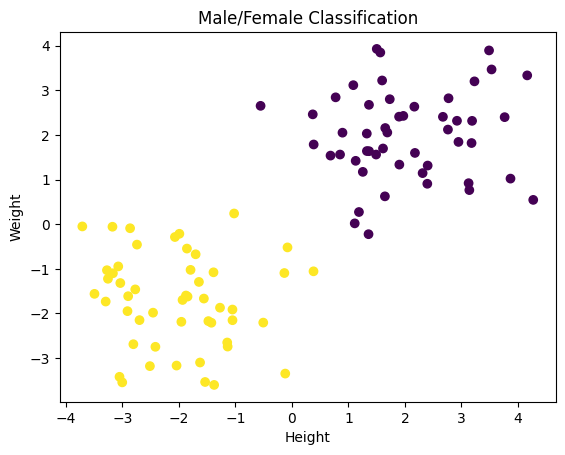

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create a sample dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Add some structure to the data
X[y == 0] += 2
X[y == 1] -= 2

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Male/Female Classification")
plt.show()

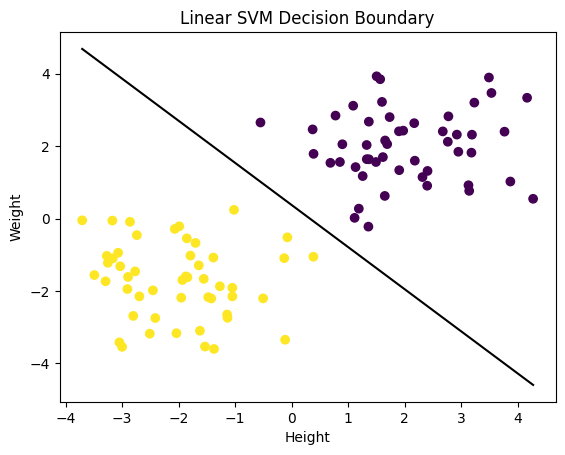

In [ ]:
# Train a Linear SVM model
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X, y)

# Plot the decision boundary
w = svm_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - svm_linear.intercept_[0] / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(xx, yy, 'k-')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Linear SVM Decision Boundary")
plt.show()

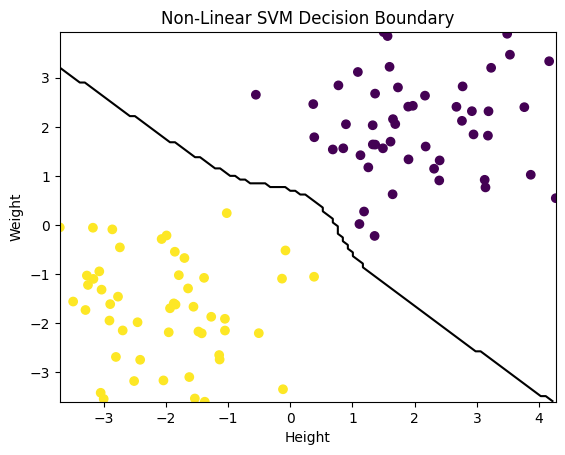

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create a sample dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Add some structure to the data
X[y == 0] += 2
X[y == 1] -= 2

# Train a Non-Linear SVM model with a polynomial kernel
svm_poly = svm.SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                      np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, [0.5], linestyles=['-'], colors='k')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Non-Linear SVM Decision Boundary")
plt.show()


Accuracy: 1.0


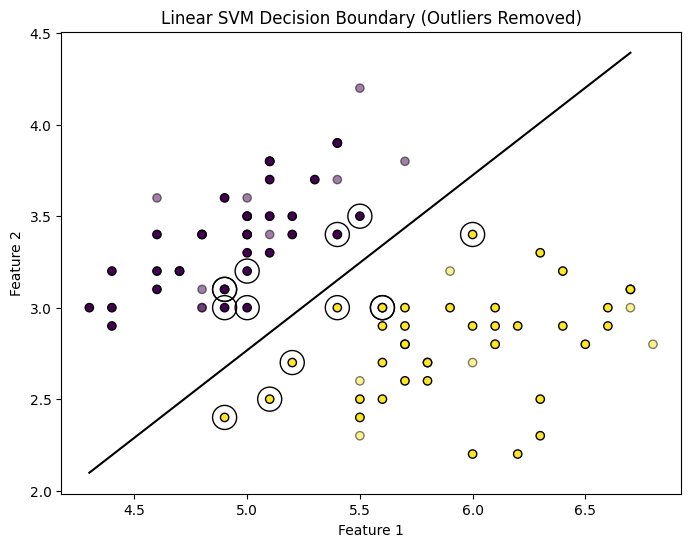

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # we only take the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LOF model to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the training data
y_pred_lof = lof.fit_predict(X_train)

# Remove outliers from the training data
X_train_clean = X_train[y_pred_lof == 1]
y_train_clean = y_train[y_pred_lof == 1]

# Define the Linear SVM model
svm_model = SVC(kernel='linear', C=1)

# Train the SVM model on the cleaned data
svm_model.fit(X_train_clean, y_train_clean)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_train_clean[:, 0].min(), X_train_clean[:, 0].max())
yy = a * xx - svm_model.intercept_[0] / w[1]

plt.plot(xx, yy, 'k-')

# Plot the support vectors
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary (Outliers Removed)')
plt.show()

Accuracy: 0.85


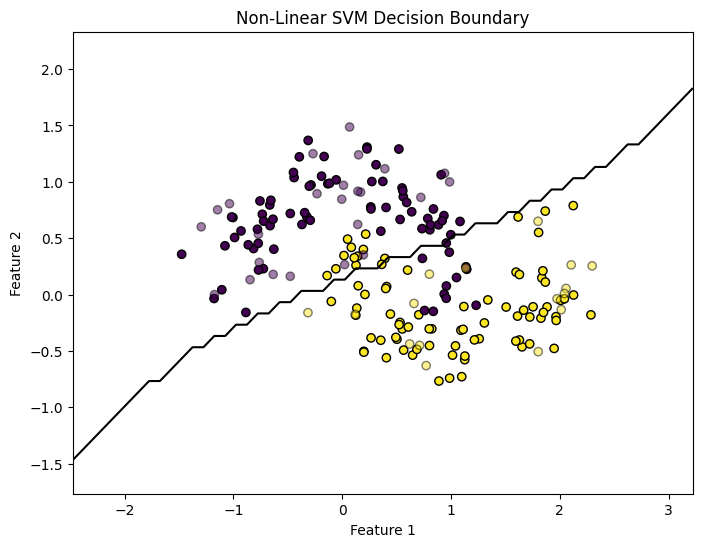

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate binary classified data using make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gaussian Kernel SVM model
svm_model = SVC(kernel='rbf', C=1, gamma=0.1)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-Linear SVM Decision Boundary')
plt.show()

Accuracy: 1.0


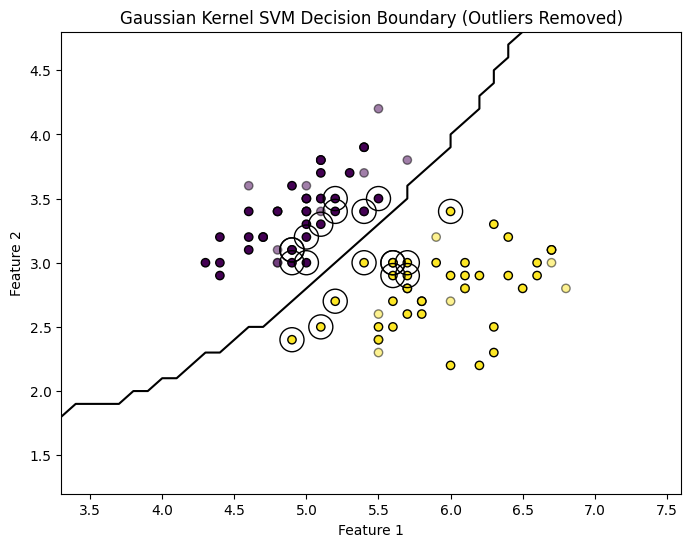

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # we only take the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LOF model to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the training data
y_pred_lof = lof.fit_predict(X_train)

# Remove outliers from the training data
X_train_clean = X_train[y_pred_lof == 1]
y_train_clean = y_train[y_pred_lof == 1]

# Define the Gaussian kernel SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM model on the cleaned data
svm_model.fit(X_train_clean, y_train_clean)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
x_min, x_max = X_train_clean[:, 0].min() - 1, X_train_clean[:, 0].max() + 1
y_min, y_max = X_train_clean[:, 1].min() - 1, X_train_clean[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Plot the support vectors
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Kernel SVM Decision Boundary (Outliers Removed)')
plt.show()

Accuracy: 1.0


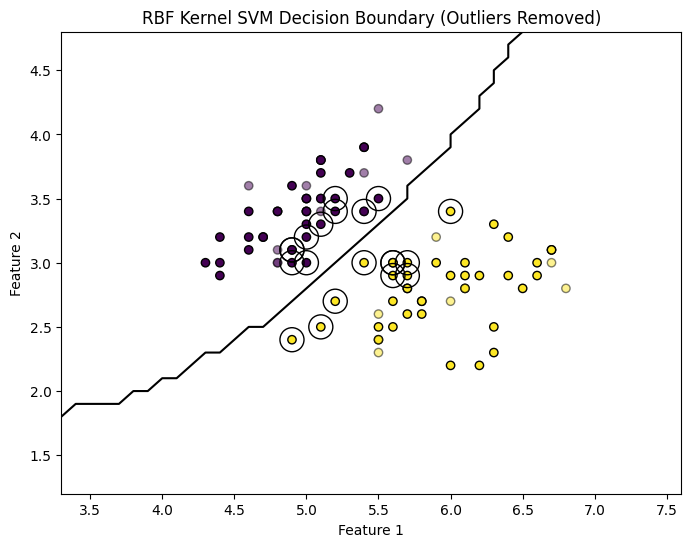

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # we only take the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LOF model to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the training data
y_pred_lof = lof.fit_predict(X_train)

# Remove outliers from the training data
X_train_clean = X_train[y_pred_lof == 1]
y_train_clean = y_train[y_pred_lof == 1]

# Define the RBF kernel SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM model on the cleaned data
svm_model.fit(X_train_clean, y_train_clean)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
x_min, x_max = X_train_clean[:, 0].min() - 1, X_train_clean[:, 0].max() + 1
y_min, y_max = X_train_clean[:, 1].min() - 1, X_train_clean[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Plot the support vectors
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF Kernel SVM Decision Boundary (Outliers Removed)')
plt.show()

Accuracy: 0.4


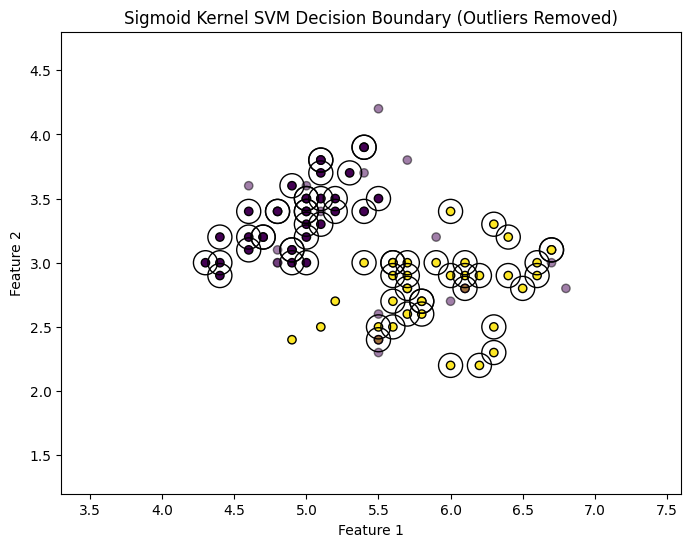

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # we only take the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LOF model to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the training data
y_pred_lof = lof.fit_predict(X_train)

# Remove outliers from the training data
X_train_clean = X_train[y_pred_lof == 1]
y_train_clean = y_train[y_pred_lof == 1]

# Define the Sigmoid kernel SVM model
svm_model = SVC(kernel='sigmoid', C=1, gamma='scale')

# Train the SVM model on the cleaned data
svm_model.fit(X_train_clean, y_train_clean)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
x_min, x_max = X_train_clean[:, 0].min() - 1, X_train_clean[:, 0].max() + 1
y_min, y_max = X_train_clean[:, 1].min() - 1, X_train_clean[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Plot the support vectors
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sigmoid Kernel SVM Decision Boundary (Outliers Removed)')
plt.show()

Accuracy: 1.0


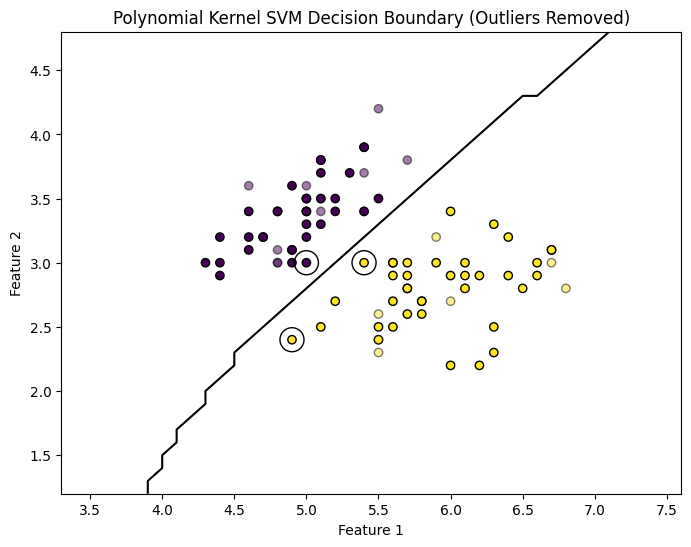

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # we only take the first two features and classes 0 and 1
y = iris.target[iris.target != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LOF model to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the training data
y_pred_lof = lof.fit_predict(X_train)

# Remove outliers from the training data
X_train_clean = X_train[y_pred_lof == 1]
y_train_clean = y_train[y_pred_lof == 1]

# Define the Polynomial kernel SVM model
svm_model = SVC(kernel='poly', degree=3, C=1, gamma='scale')

# Train the SVM model on the cleaned data
svm_model.fit(X_train_clean, y_train_clean)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_clean[:, 0], X_train_clean[:, 1], c=y_train_clean, cmap='viridis', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.5)

# Plot the decision boundary
x_min, x_max = X_train_clean[:, 0].min() - 1, X_train_clean[:, 0].max() + 1
y_min, y_max = X_train_clean[:, 1].min() - 1, X_train_clean[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# Plot the support vectors
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial Kernel SVM Decision Boundary (Outliers Removed)')
plt.show()